In [133]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#**Exploratory Data Analysis**

In [134]:
df=pd.read_excel('/content/Model.xlsx')
df.head()

,Physician ID,Specialty,Patient_Age,Physician_Practice_Setting,Place_of_Service,Year_of_Practice,Familiarty_CompetitorA,Familiarty_CompetitorB,Familiarty_CompetitorC,Importance_Product_Safety,Importance_Product_Efficacy,Importance_Product_Quality_Life,Importance_Patient_Age,Importance_Severe_Symptoms,Importance_Other_Comorbidities,Managed_Number_of_Target_Patients,Target
0,1,Epileptologist,Adult,Academic,Hospital,15,5,5,5,4,4,4,5,4,4,29,Current User
1,2,Epileptologist,Adult,Community,Clinic,12,5,5,5,5,5,5,3,5,5,15,Future User
2,3,Epileptologist,Adult,Community,Unknown,24,5,5,5,5,5,4,4,4,4,40,Non-User
3,4,Epileptologist,Adult,Academic,Clinic,6,5,5,5,4,4,4,4,5,4,25,Current User
4,5,Epileptologist,Adult,Community,Hospital,15,5,5,5,3,5,4,3,5,3,24,Future User


**Basic Data Exploration**

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Physician ID                       150 non-null    int64 
 1   Specialty                          150 non-null    object
 2   Patient_Age                        150 non-null    object
 3   Physician_Practice_Setting         150 non-null    object
 4   Place_of_Service                   150 non-null    object
 5   Year_of_Practice                   150 non-null    int64 
 6   Familiarty_CompetitorA             150 non-null    int64 
 7   Familiarty_CompetitorB             150 non-null    int64 
 8   Familiarty_CompetitorC             150 non-null    int64 
 9   Importance_Product_Safety          150 non-null    int64 
 10  Importance_Product_Efficacy        150 non-null    int64 
 11  Importance_Product_Quality_Life    150 non-null    int64 
 12  Importan

In [136]:
df.describe()

,Physician ID,Year_of_Practice,Familiarty_CompetitorA,Familiarty_CompetitorB,Familiarty_CompetitorC,Importance_Product_Safety,Importance_Product_Efficacy,Importance_Product_Quality_Life,Importance_Patient_Age,Importance_Severe_Symptoms,Importance_Other_Comorbidities,Managed_Number_of_Target_Patients
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,16.553333,4.153333,4.633333,4.553333,4.066667,4.073333,4.280000,3.480000,4.140000,3.540000,44.760000
std,43.445368,8.976133,1.021492,0.628375,0.773180,0.931670,0.820023,0.803683,0.960425,0.976434,0.931406,33.536653
min,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,5.000000
25%,38.250000,10.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,4.000000,3.000000,25.000000
50%,75.500000,15.000000,4.000000,5.000000,5.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,40.000000
75%,112.750000,22.750000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,4.000000,60.000000
max,150.000000,39.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,350.000000


In [137]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 Physician ID                         0
Specialty                            0
Patient_Age                          0
Physician_Practice_Setting           0
Place_of_Service                     0
Year_of_Practice                     0
Familiarty_CompetitorA               0
Familiarty_CompetitorB               0
Familiarty_CompetitorC               0
Importance_Product_Safety            0
Importance_Product_Efficacy          0
Importance_Product_Quality_Life      0
Importance_Patient_Age               0
Importance_Severe_Symptoms           0
Importance_Other_Comorbidities       0
Managed_Number_of_Target_Patients    0
Target                               0
dtype: int64


**No Missing Values in the Dataset**

In [138]:
df['Target'].value_counts()

,count
Target,
Current User,50
Future User,50
Non-User,50


**Dataset is Balanced**

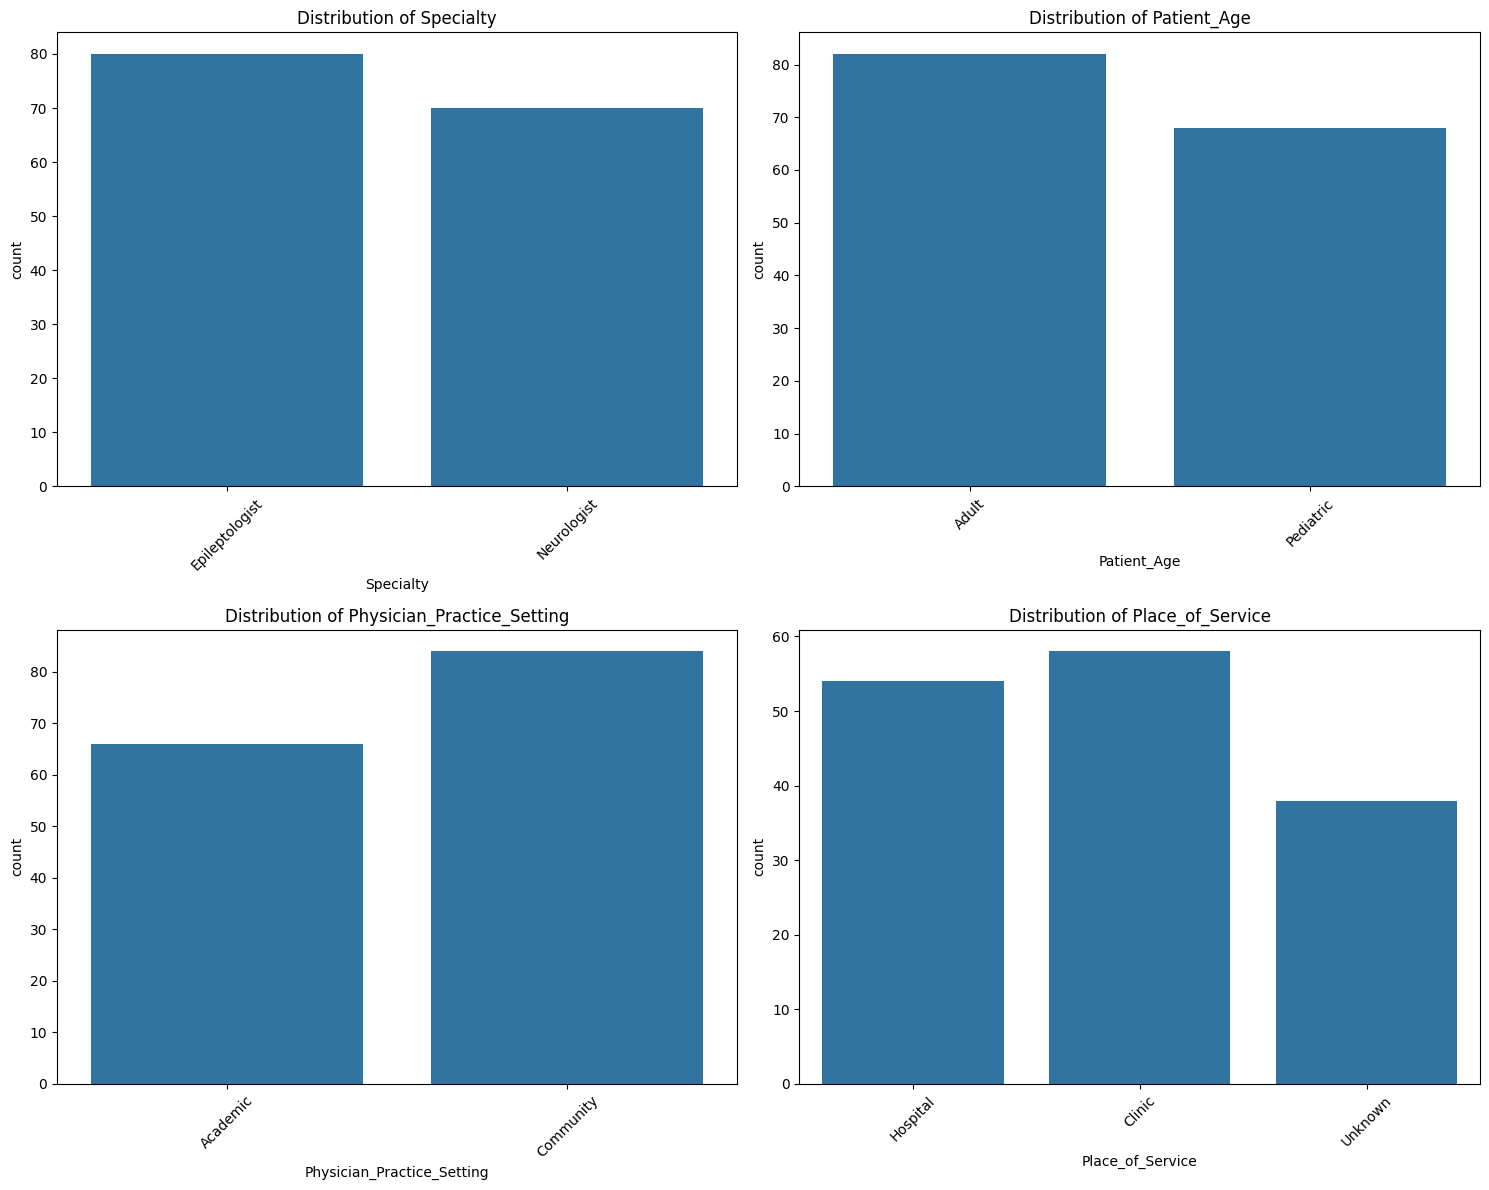

In [139]:
#Categorical Variables distribution
categorical_cols = ['Specialty', 'Patient_Age', 'Physician_Practice_Setting', 'Place_of_Service']

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

for idx, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, ax=axes[idx])
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

**Specialty:** The majority of physicians are Epileptologists.

**Patient Age:** Most physicians treat adult patients compared to pediatric patients which is a bit less comparatively.

**Physician Practice Setting:** More physicians work in community settings compared to academic.

**Place of Service:** Clinics and hospitals are the most common service locations.

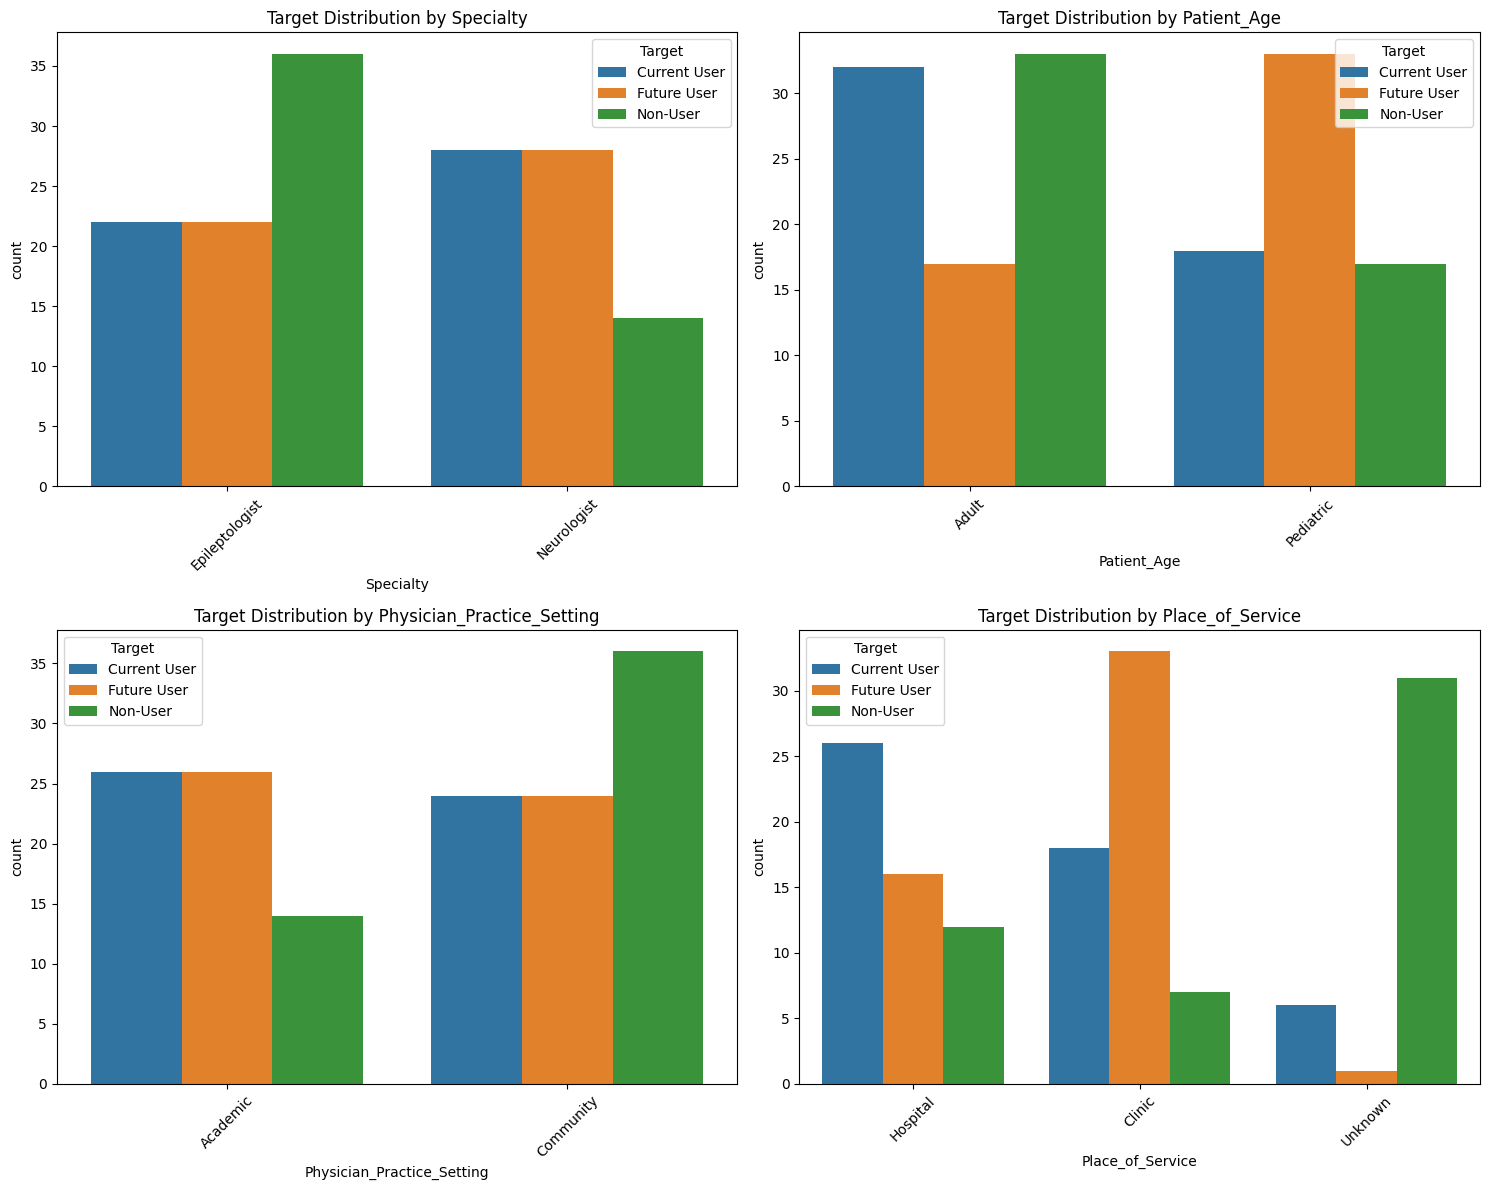

In [140]:
# Target vs Categorical Variables
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

for idx, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, hue='Target', ax=axes[idx])
    axes[idx].set_title(f'Target Distribution by {col}')
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


**Target vs Specialty:** Epileptologists are mostly non users of product, while Neurologists are mostly future and currect users.

**Target vs Patient Age:** Physicians treating adults are mostly non-users, while those treating pediatric patients are more likely future users.

**Target vs Practice Setting:** Academic physicians are evenly split between current and future users, while community physicians are largely non-users.

**Target vs Place of Service:** Clinics have the most future users, hospitals have more current users, and unknown locations are dominated by non-users.

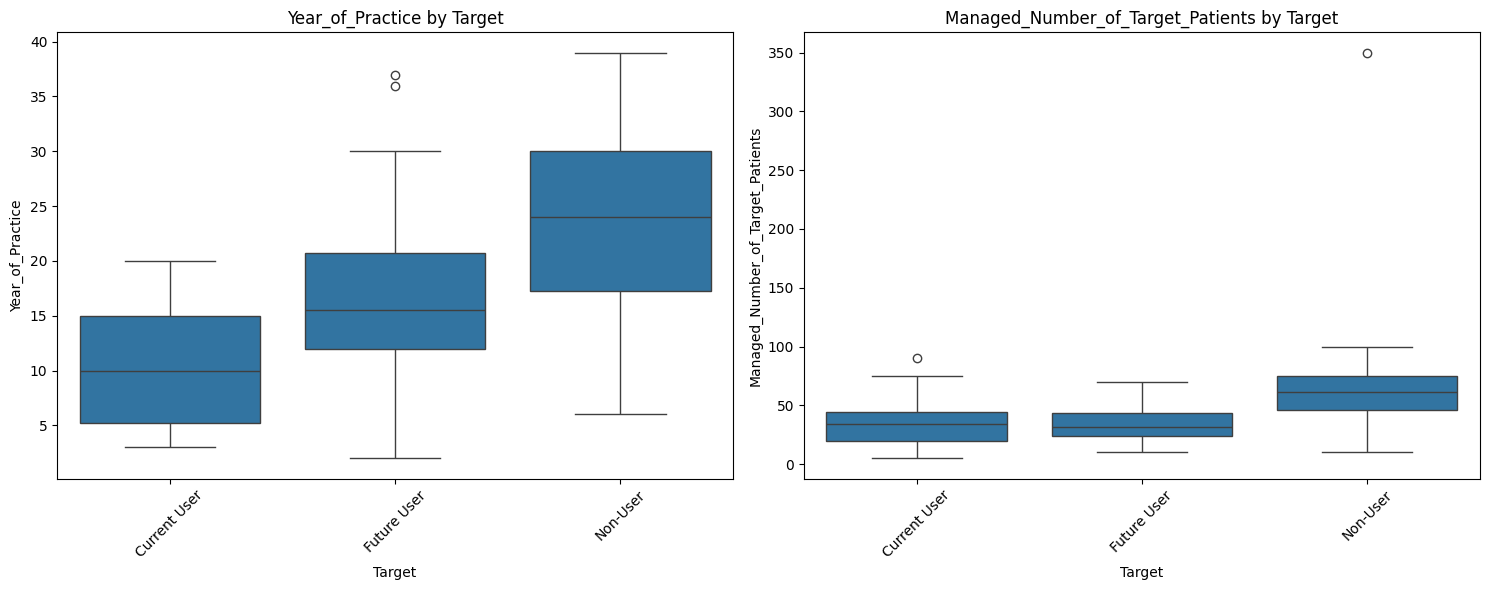

In [141]:
#Analysis of Numerical Variables
numerical_cols = ['Year_of_Practice', 'Managed_Number_of_Target_Patients']

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

for idx, col in enumerate(numerical_cols):
    sns.boxplot(data=df, y=col, x='Target', ax=axes[idx])
    axes[idx].set_title(f'{col} by Target')
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

**Year of Practice by Target:**

**Current Users:** Typically have fewer years of practice with less variation.

**Future Users:** Generally more experienced, with a wider range of practice years.

**Non-Users:** Generally more experienced than Future Users.  

**Managed Number of Target Patients by Target:**

**Current Users and Future Users:** Manage fewer target patients, indicating limited exposure.

**Non-Users:** Manage more no of Target patients as compared to Future and current Users.

**Insights:**

**Year of Practice by Target:** More seasoned physicians are more likely to be Non-Users, suggesting they are not open to adopting new treatments based on their broader clinical experience.


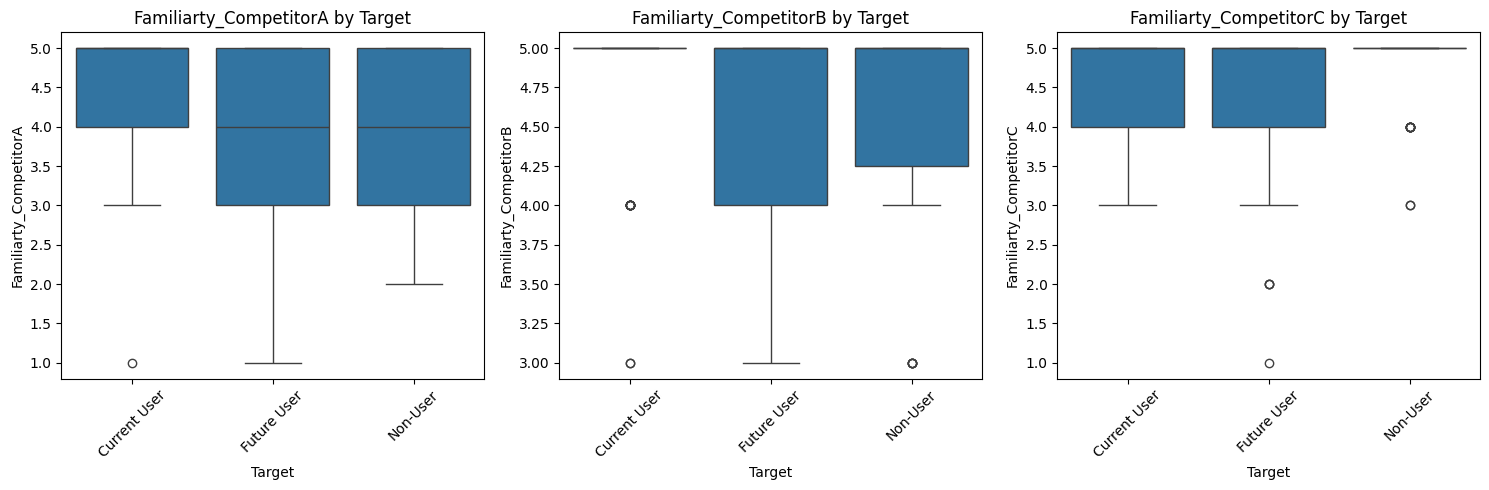

In [142]:
#Analysis Of Competitor vs Target
familiarity_cols = ['Familiarty_CompetitorA', 'Familiarty_CompetitorB', 'Familiarty_CompetitorC']

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for idx, col in enumerate(familiarity_cols):
    sns.boxplot(data=df, y=col, x='Target', ax=axes[idx])
    axes[idx].set_title(f'{col} by Target')
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

**Familiarity with Competitor A**

**Current Users:** Display high familiarity with Competitor A.

**Future Users:** Similar familiarity levels as Current Users but with greater variability.

**Non-Users:** Similar familiarity levels as Current and Future Users, but with slightly less variability than Future users.

**Familiarity with Competitor B**

**Current Users:** Show consistently high familiarity, with minimal variability and outliers indicating lower familiarity.

**Future Users:** Show consistently high familiarity, with great variability

**Non-Users:** Similar familiarity levels as Current and Future Users, but with slightly less variability than Future users.

**Familiarity with Competitor C**

**Current Users and Future Users:** High familiarity.

**Non-Users:** Also display high familiarity but with a few outliers indicating low familiarity.

**Insights:**

**Familiarity Impact:** Current, Future Users and Non-Users generally exhibit high familiarity with all competitors, suggesting familiarity might influence their decision to adopt the product.

**DecisionTree feature importance to remove irrelevant features**

In [143]:
X = df.drop(['Physician ID', 'Target'], axis=1)
y = df['Target']

#I am using label encoding as it doesn't affect tree algorithms because they split data based on feature thresholds
for col in ['Specialty', 'Patient_Age', 'Physician_Practice_Setting', 'Place_of_Service']:
    X[col] = LabelEncoder().fit_transform(X[col])

# Train
dt = DecisionTreeClassifier(random_state=42).fit(X, y)

#feature importance DataFrame
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': dt.feature_importances_})
feature_importance = feature_importance.sort_values('Importance', ascending=False)
feature_importance['Importance_Percentage'] = (feature_importance['Importance'] * 100).round(2)

print("\nDecision Tree Feature Importance Rankings:")
print(feature_importance.to_string(index=False))
print(f"Top 5 features account for {feature_importance['Importance_Percentage'].head(5).sum():.2f}% of total importance")

importance_threshold = 0.10  # Defining an importance threshold to remove irrelavant columns
features_to_drop = feature_importance[feature_importance['Importance'] < importance_threshold]['Feature']
X = X.drop(columns=features_to_drop)


Decision Tree Feature Importance Rankings:
                          Feature  Importance  Importance_Percentage
                 Year_of_Practice    0.322490                  32.25
Managed_Number_of_Target_Patients    0.165665                  16.57
                 Place_of_Service    0.142057                  14.21
       Importance_Severe_Symptoms    0.105919                  10.59
           Importance_Patient_Age    0.072527                   7.25
      Importance_Product_Efficacy    0.064439                   6.44
   Importance_Other_Comorbidities    0.061667                   6.17
                      Patient_Age    0.030000                   3.00
                        Specialty    0.015000                   1.50
       Physician_Practice_Setting    0.008571                   0.86
           Familiarty_CompetitorA    0.006667                   0.67
        Importance_Product_Safety    0.005000                   0.50
           Familiarty_CompetitorB    0.000000              

#**Modeling**

**1) Decision Tree**

I have used Decision Tree as it is ideal for rule generation because it naturally creates intuitive, if-then-else rules by splitting the data based on feature importance. and Logistic Regression is excellent for rule generation when combined with regularization, as it highlights the most impactful features.

Since the dataset is small, more complex models like Random Forest and XGBoost are prone to overfitting and are not suitable for rule generation thats why i havent used them.


Model Performance Metrics:
------------------------------

Classification Report:
              precision    recall  f1-score   support

Current User       0.80      0.40      0.53        10
 Future User       0.67      0.80      0.73        10
    Non-User       0.77      1.00      0.87        10

    accuracy                           0.73        30
   macro avg       0.75      0.73      0.71        30
weighted avg       0.75      0.73      0.71        30


confusion matrix:
[[ 4  4  2]
 [ 1  8  1]
 [ 0  0 10]]

Accuracy Score: 0.7333333333333333
Recall Score (macro): 0.7333333333333334


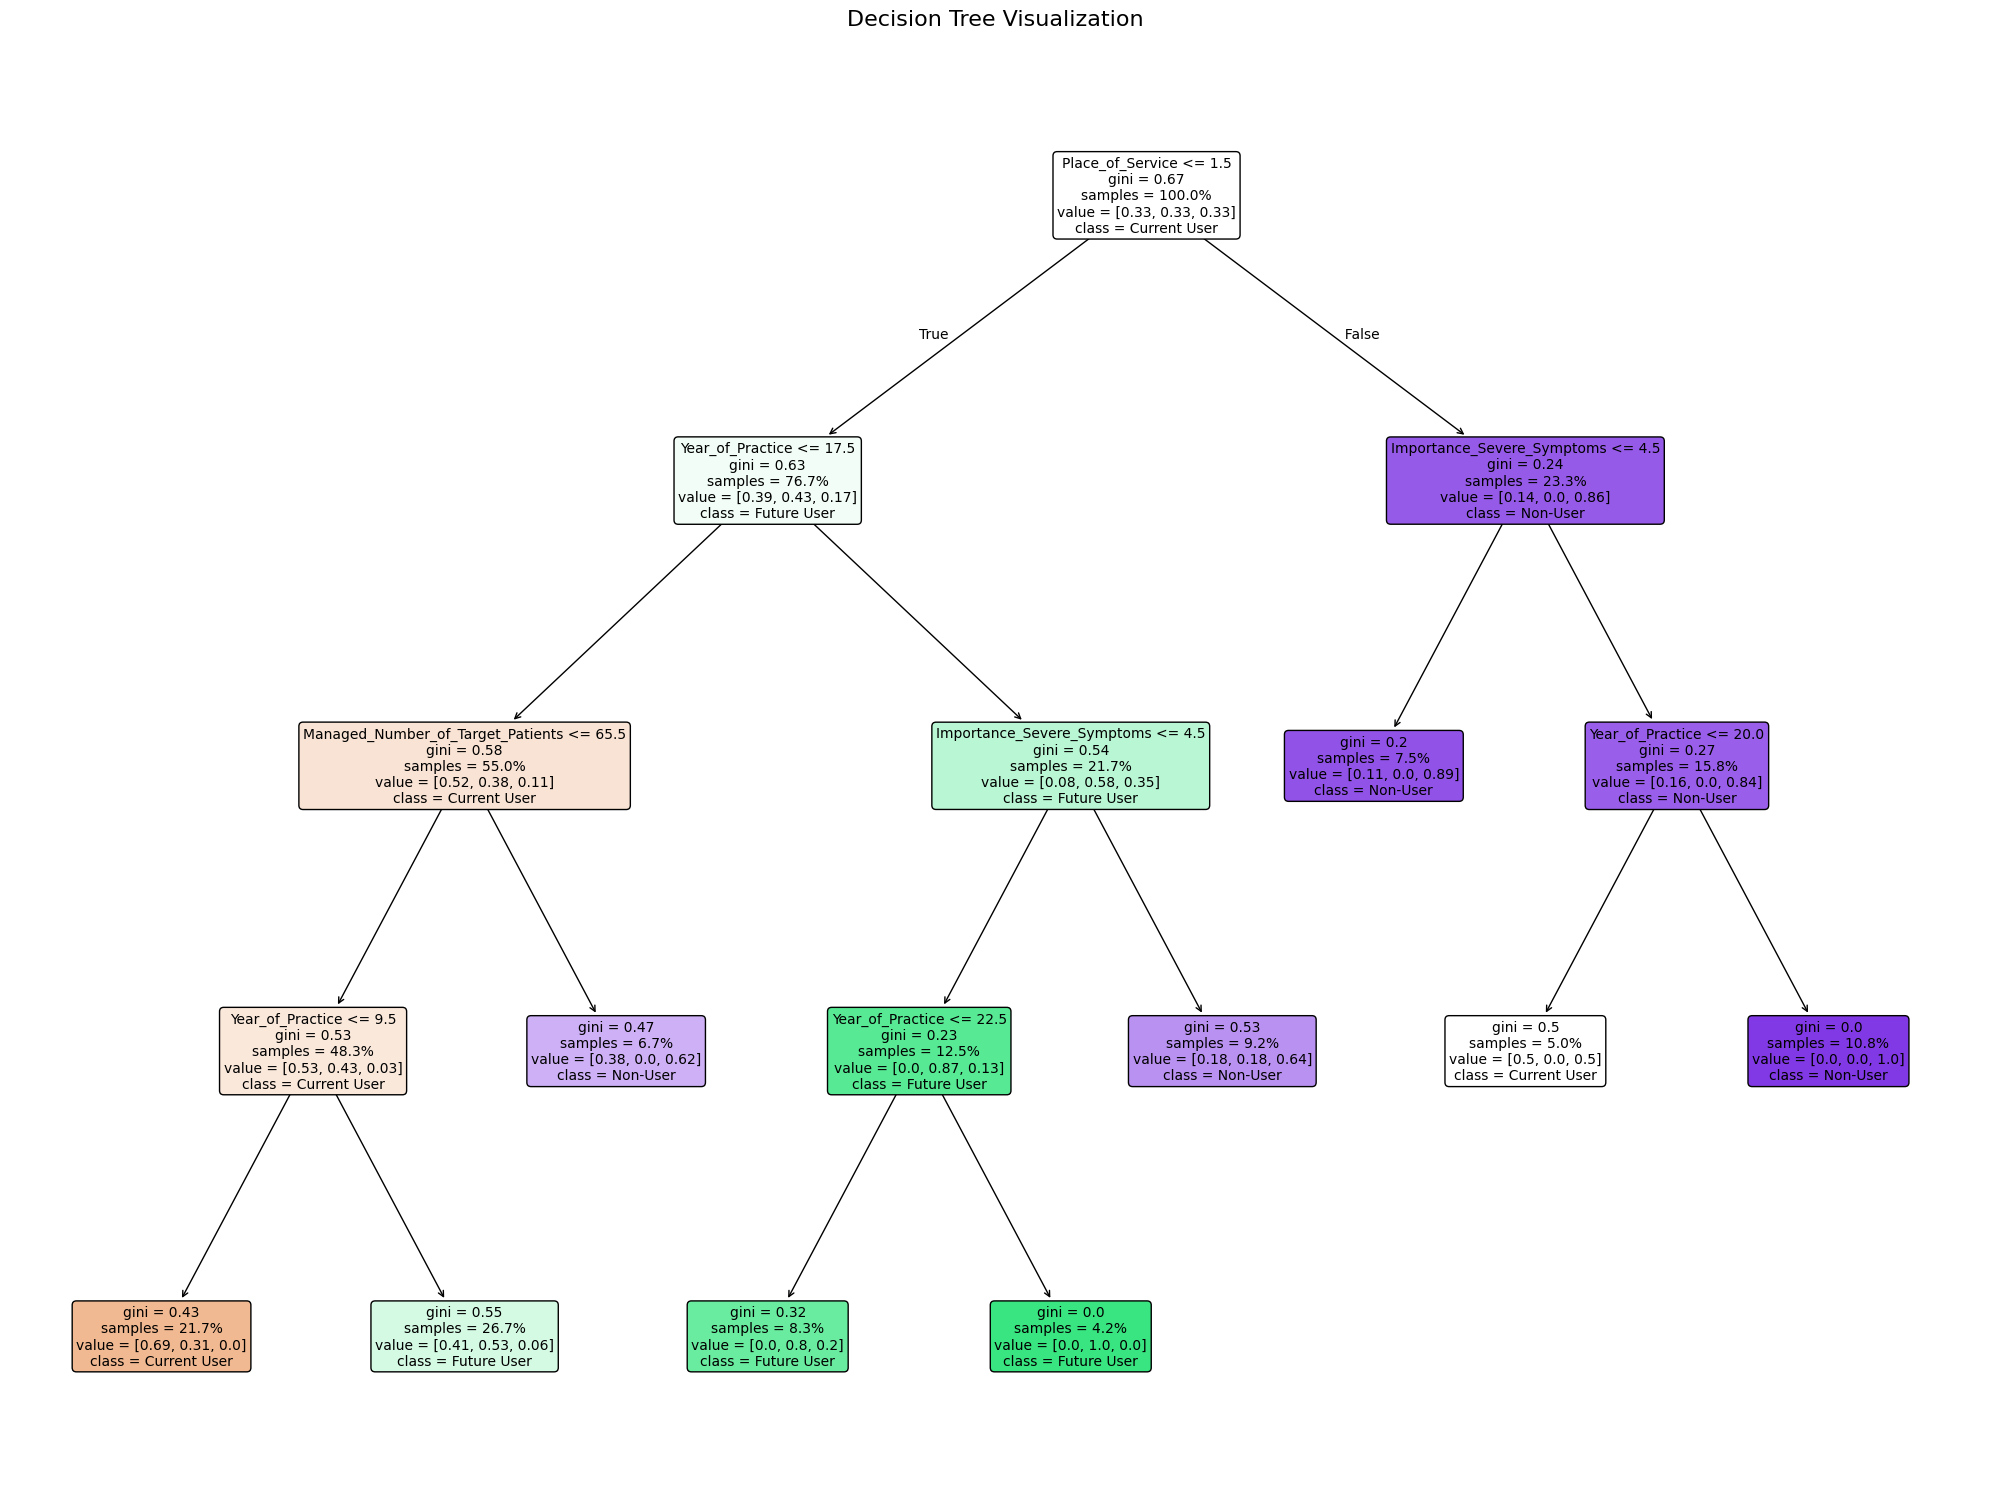

In [144]:
# feature names
feature_names = X.columns.tolist()

# Train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,  # for reproducibility
    stratify=y
)

# Model
model = DecisionTreeClassifier(
    max_depth=4,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features='sqrt',
    random_state=42
)

# model fit
model.fit(X_train, y_train)

# predictions on test set
y_pred = model.predict(X_test)

# performance metrics
print("\nModel Performance Metrics:")
print("-" * 30)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nconfusion matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("Recall Score (macro):", recall_score(y_test, y_pred, average='macro'))

# Tree Visualization
plt.figure(figsize=(20, 15))
plot_tree(model,
          feature_names=feature_names,
          class_names=['Current User', 'Future User', 'Non-User'],
          filled=True,
          rounded=True,
          fontsize=10,
          proportion=True,
          precision=2)
plt.title('Decision Tree Visualization', fontsize=16, pad=20)
plt.tight_layout()
plt.show()



I calculated the confusion matrix using only the test data, as calculating it for the entire dataset would lead to overfitting.

**2) Logisitc Regression**

In [102]:
categorical_features = ['Specialty', 'Patient_Age', 'Physician_Practice_Setting', 'Place_of_Service']
numerical_features = ['Year_of_Practice', 'Familiarty_CompetitorA', 'Familiarty_CompetitorB',
                     'Familiarty_CompetitorC', 'Importance_Product_Safety', 'Importance_Product_Efficacy',
                     'Importance_Product_Quality_Life', 'Importance_Patient_Age',
                     'Importance_Severe_Symptoms', 'Importance_Other_Comorbidities',
                     'Managed_Number_of_Target_Patients']

# preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

# pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(
        multi_class='ovr',
        penalty='l1', #I used Logistic Regression with L1 regularization to select the most impactful features for rule generation
        solver='liblinear',
        C=0.1,                # Stronger regularization
        class_weight='balanced',
        max_iter=300,
        tol=1e-4,            # Smaller tolerance for better convergence
        random_state=42
    ))
])

X = df[categorical_features + numerical_features]
y = df['Target']

# Train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# pipeline
pipeline.fit(X_train, y_train)

# predictions
y_pred_train = pipeline.predict(X_train)
y_pred_test = pipeline.predict(X_test)

# metrics
print("\nTest Set Performance:")
print("-" * 30)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test))


Test Set Performance:
------------------------------

Confusion Matrix:
[[9 1 0]
 [3 3 4]
 [1 0 9]]

Classification Report:
              precision    recall  f1-score   support

Current User       0.69      0.90      0.78        10
 Future User       0.75      0.30      0.43        10
    Non-User       0.69      0.90      0.78        10

    accuracy                           0.70        30
   macro avg       0.71      0.70      0.66        30
weighted avg       0.71      0.70      0.66        30



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


#Model analysis

The accuracy of the Decision Tree (73%) is higher than that of Logistic Regression (70%), making the Decision Tree the better model for the first step.

**Future User:**
Recall is more important because the client aims to identify as many potential future users as possible, minimizing missed opportunities.

**Current User:**
Precision is more important because the focus is on accurately identifying existing users to avoid misclassifying others as current users.

**Non-User:**
Precision is more important to ensure marketing efforts are not wasted on physicians unlikely to adopt the product.
***

**Model Comparision**

**Model1:** Logisitc Regression

**Model2:** Decision Tree
***

**Current User:**

**Model 1:**

Precision: 0.69

Recall: 0.90 (high recall ensures most Current Users are identified).

**Model 2:**

Precision: 0.80 (better at accurately identifying Current Users).

Recall: 0.40 (misses many Current Users).

**Conclusion:** Model 1 is better for recall (capturing more Current Users), while Model 2 is better for precision (accurate identification).

***

**Future User:**

**Model 1:**

Precision: 0.75

Recall: 0.30 (low recall misses many Future Users).

**Model 2:**

Precision: 0.67

Recall: 0.80 (better at identifying Future Users).

**Conclusion:** Model 2 is better for recall, aligning with the goal of identifying potential Future Users.

***

**Non-User:**

**Model 1:**

Precision: 0.69

Recall: 0.90 (high recall ensures most Non-Users are captured).

**Model 2:**

Precision: 0.77 (better at accurately identifying Non-Users).

Recall: 1.00 (captures all Non-Users).

**Conclusion:** Model 2 is superior in both precision and recall for Non-Users.

***

**Overall Assessment:**

**Future User:** Model 2 (higher recall is critical for capturing potential users).

**Current User:** Model 1 (better recall ensures existing users aren't missed).

**Non-User:** Model 2 (better precision and perfect recall avoid wasted marketing).

**Model 2 better.**

**Generate Rules Based On Decision Tree Model**

In [124]:
def extract_top_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [feature_names[i] if i != -2 else "undefined!" for i in tree_.feature]

    def get_rule(path, node):
        if path is None:
            path = []

        if tree_.feature[node] != -2:
            name = feature_name[node]
            threshold = tree_.threshold[node]

            left_path = path + [(name, "<=", threshold)]
            right_path = path + [(name, ">", threshold)]

            return get_rule(left_path, tree_.children_left[node]) + \
                   get_rule(right_path, tree_.children_right[node])
        else:
            majority_class = class_names[np.argmax(tree_.value[node][0])]
            confidence = (max(tree_.value[node][0]) / sum(tree_.value[node][0])) * 100

            return [{
                'path': path,
                'class': majority_class,
                'confidence': confidence,
                'samples': tree_.n_node_samples[node]
            }]

    # Get all rules and sort by confidence
    rules = get_rule(None, 0)
    rules = sorted(rules, key=lambda x: x['confidence'], reverse=True)

    print("\nTop 3 Rules for Each Class:")
    print("===========================")

    for class_name in class_names:
        print(f"\n{class_name}:")
        class_rules = [r for r in rules if r['class'] == class_name]

        for rule in class_rules[:3]:  # Get top 3 rules only
            conditions = [f"{feature} {op} {threshold:.2f}" if isinstance(threshold, float)
                        else f"{feature} {op} {threshold}"
                        for feature, op, threshold in rule['path']]

            print(f"\nIF {' AND '.join(conditions)}")
            print(f"THEN {rule['class']}")
            print(f"Confidence: {rule['confidence']:.1f}%")
            print(f"Samples: {rule['samples']}")

# Apply the rule extraction
extract_top_rules(
    model,
    feature_names=feature_names,
    class_names=['Current User', 'Future User', 'Non-User']
)


Top 3 Rules for Each Class:

Current User:

IF Specialty <= 1.50 AND Patient_Age <= 17.50 AND Year_of_Practice <= 65.50 AND Patient_Age <= 9.50
THEN Current User
Confidence: 69.2%
Samples: 26

IF Specialty > 1.50 AND Place_of_Service > 4.50 AND Patient_Age <= 20.00
THEN Current User
Confidence: 50.0%
Samples: 6

Future User:

IF Specialty <= 1.50 AND Patient_Age > 17.50 AND Place_of_Service <= 4.50 AND Patient_Age > 22.50
THEN Future User
Confidence: 100.0%
Samples: 5

IF Specialty <= 1.50 AND Patient_Age > 17.50 AND Place_of_Service <= 4.50 AND Patient_Age <= 22.50
THEN Future User
Confidence: 80.0%
Samples: 10

IF Specialty <= 1.50 AND Patient_Age <= 17.50 AND Year_of_Practice <= 65.50 AND Patient_Age > 9.50
THEN Future User
Confidence: 53.1%
Samples: 32

Non-User:

IF Specialty > 1.50 AND Place_of_Service > 4.50 AND Patient_Age > 20.00
THEN Non-User
Confidence: 100.0%
Samples: 13

IF Specialty > 1.50 AND Place_of_Service <= 4.50
THEN Non-User
Confidence: 88.9%
Samples: 9

IF Specia

**Apporach:**
I used a Decision Tree because it generates clear, easy-to-understand rules and performed better than Logistic Regression (73% vs. 70% accuracy). The rules help classify physicians as Current Users, Future Users, or Non-Users. Logistic Regression with L1 regularization was also used to pinpoint the most important features for better insights.

**How Rules Were Generated:** I generated the rules by training a Decision Tree model to classify physicians into categories like Current Users, Future Users, and Non-Users based on their survey responses. The tree structure was analyzed to extract the most significant decision paths, which represent clear if-then rules highlighting how different features impact the predictions. These rules were ranked by confidence and filtered to focus on the top-performing ones, ensuring they are both accurate and actionable for each target class.

Top 3 Rules for Each Class:
===========================

**Current User:**

*   IF Specialty <= 1.50 AND Patient_Age <= 17.50 AND Year_of_Practice <= 65.50 AND Patient_Age <= 9.50
THEN Current User
*   IF Specialty > 1.50 AND Place_of_Service > 4.50 AND Patient_Age <= 20.00
THEN Current User

**Future User:**

*   IF Specialty <= 1.50 AND Patient_Age > 17.50 AND Place_of_Service <= 4.50 AND Patient_Age > 22.50
THEN Future User
*   IF Specialty <= 1.50 AND Patient_Age > 17.50 AND Place_of_Service <= 4.50 AND Patient_Age <= 22.50
THEN Future User
*   IF Specialty <= 1.50 AND Patient_Age <= 17.50 AND Year_of_Practice <= 65.50 AND Patient_Age > 9.50
THEN Future User

**Non-User:**

*   IF Specialty > 1.50 AND Place_of_Service > 4.50 AND Patient_Age > 20.00
THEN Non-User
*   IF Specialty > 1.50 AND Place_of_Service <= 4.50
THEN Non-User
*   IF Specialty <= 1.50 AND Patient_Age > 17.50 AND Place_of_Service > 4.50
THEN Non-User

**Layman Deliverable Summary:**
*****
**Current User:**

**Rule1:** Physicians who specialize in Neurology or Epileptology, treat Pediatric patients, and have less than 65 years of practice are likely to be Current Users.

**Sample Size:** 26 physicians (17% of all physicians).

**Accuracy**: 69.2% can be correctly classified as Current Users.

**Rule2:** Physicians who do not specialize in Neurology or Epileptology, work in unknown service settings, and treat younger patients are likely to be Current Users.

**Sample Size:** 6 physicians (4% of all physicians).

**Accuracy:** 50% can be correctly classified as Current Users.
*****
**Future User:**

**Rule1:** Physicians who specialize in Neurology or Epileptology, treat Adult patients over 22 years old, and work in known service settings are likely to be Future Users.

**Sample Size:** 5 physicians (3% of all physicians).

**Accuracy:** 100% can be correctly classified as Future Users.

**Rule2:** Physicians who specialize in Neurology or Epileptology, treat Adult patients between 18-22 years old, and work in known service settings are likely to be Future Users.

**Sample Size:** 10 physicians (7% of all physicians).

**Accuracy:** 80% can be correctly classified as Future Users.

**Rule3:** Physicians who specialize in Neurology or Epileptology, treat Pediatric patients over 9 years old, and have less than 65 years of practice are likely to be Future Users.

**Sample Size:** 32 physicians (21% of all physicians).

**Accuracy:** 53.1% can be correctly classified as Future Users.
*****
**Non-User:**

**Rule1:** Physicians who do not specialize in Neurology or Epileptology, work in unknown service settings, and treat older patients are likely to be Non-Users.

**Sample Size:** 13 physicians (9% of all physicians).

**Accuracy:** 100% can be correctly classified as Non-Users.

**Rule2:** Physicians who do not specialize in Neurology or Epileptology and work in known service settings are likely to be Non-Users.

**Sample Size:** 9 physicians (6% of all physicians).

**Accuracy:** 88.9% can be correctly classified as Non-Users.

**Rule3:** Physicians who specialize in Neurology or Epileptology, treat Adult patients over 18 years old, and work in unknown service settings are likely to be Non-Users.

**Sample Size:** 11 physicians (7% of all physicians).

**Accuracy:** 63.6% can be correctly classified as Non-Users.